<a href="https://colab.research.google.com/github/swethaarja717/Expectatiom-maximization-based-clustering/blob/main/Expectation_maximum_based_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
data = pd.read_csv("/content/IRIS (1).csv")

In [3]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = data[features]


In [5]:
n_components_range = range(1, 10)  # Test different numbers of clusters
lowest_bic = np.inf  # Changed np.infty to np.inf
optimal_n_components = 0

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=0)
    gmm.fit(X)
    bic = gmm.bic(X)
    if bic < lowest_bic:
        lowest_bic = bic
        optimal_n_components = n_components

print(f"Optimal number of clusters (based on BIC): {optimal_n_components}")

Optimal number of clusters (based on BIC): 2


In [6]:
gmm = GaussianMixture(n_components=optimal_n_components, covariance_type='full', random_state=0)
gmm.fit(X)


GaussianMixture(n_components=2, random_state=0)

In [7]:
labels = gmm.predict(X)

In [8]:
data['cluster_gmm'] = labels

In [10]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   cluster_gmm  
0            0  
1            0  
2            0  
3            0  
4            0  


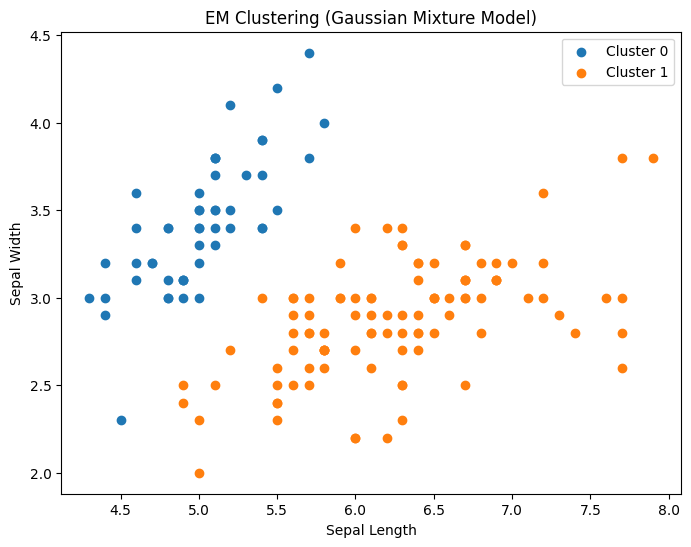

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for cluster in range(optimal_n_components):
    cluster_data = data[data['cluster_gmm'] == cluster]
    plt.scatter(cluster_data['sepal_length'], cluster_data['sepal_width'], label=f'Cluster {cluster}')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('EM Clustering (Gaussian Mixture Model)')
plt.legend()
plt.show()
